In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def filter_by_loc(traj,xlimit=1430,ylimit=0):
    # Quick script to remove wrong points
    locs = np.array(traj['loc'])
    loc = []
    rew = []
    obs = []
    act = []
    t = []
    for i in range(locs.shape[0]):
        if locs[i,0]!=0 and locs[i,1]!=0:
            if locs[i,0]<xlimit and locs[i,1]>ylimit:
                loc.append(locs[i,:])
                rew.append(traj['reward'][i])
                obs.append(traj['obs'][i])
                t.append(traj['t'][i])
                act.append(traj['action'][i])
    return np.array(loc),np.array(rew),(np.array(obs)*180).astype(int),np.array(act),np.array(t)


def make_df(traj, time_ahead=30, 
            xlimit=1430,ylimit=0, 
            time_steps=10):
    # time_steps is how many steps ahead each sample is taken. E.g. 1 would mean a continuous sliding window
    # Makes a dataframe where each row is a data point containing 
    # - time
    # - current observation
    # - action
    # - next observation
    # - sum of rewards from current : current + time_ahead
    
    loc,rew,obs,act,t_all = filter_by_loc(traj,xlimit=xlimit,ylimit=ylimit)
    df = pd.DataFrame(columns=['obs_b','obs_h','action','next_obs_b','next_obs_h','reward','loc'])
    
    # Loops through all points and adds to dataframe
    for i in np.arange(0, len(t_all)-time_ahead, time_steps):
        df = df.append({
            't':t_all[i],
            'obs_b':obs[i][0],
            'obs_h':obs[i][1],
            'action':act[i],
            'next_obs_b':obs[i+1][0],
            'next_obs_h':obs[i+1][1],
            'reward':sum(rew[i+1:i+1+time_ahead]),
            'loc':loc[i]
            }, ignore_index=True)

    return df

def join_buffers(b1,b2):
    return {k: np.concatenate((b1[k],b2[k]),axis=0) for k in b1.keys()}

In [4]:
with open(fnames[0],'rb') as f:
    traj = pickle.load(f)

In [8]:
traj['reward']

[1.444444444444457,
 1.3999999999999773,
 -1.7333333333332916,
 3.933333333333337,
 -1.6909090909090878,
 4.840909090909065,
 -1.4166666666666856,
 1.1960784313725412,
 -0.029411764705855565,
 1.25,
 -0.4833333333333485,
 0.4000000000000341,
 0.33333333333331444,
 -0.3333333333333144,
 0.5714285714285552,
 0.47619047619048166,
 -0.24761904761905384,
 0.41568627450979534,
 1.492647058823536,
 2.65625,
 -1.0729166666666572,
 1.0416666666666572,
 7.054417045781225e-18,
 0.3225806451612812,
 -0.09677419354838436,
 1.4408602150537606,
 0.6376811594203106,
 0.6004140786749304,
 -0.08658008658008498,
 0.6818181818181871,
 0.02173913043478136,
 0.3913043478260932,
 -0.24637681159421734,
 -0.3541666666666572,
 0.9375,
 1.9166666666666572,
 -0.27777777777777146,
 1.2401433691756267,
 -0.16474654377879008,
 0.40608465608465855,
 0.3988603988603927,
 0.11076923076922184,
 -0.09428571428571786,
 0.9450549450549489,
 0.05183946488295989,
 -0.5133779264214127,
 2.130769230769232,
 0.7739130434782453,

In [3]:
fnames=[
#     'Data/traj12-11-2020_19-55-19.pkl', #none
#     'Data/traj12-11-2020_20-05-11.pkl',
#     'Data/traj12-11-2020_20-15-17.pkl',
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430
]

# xlims = None#[1e6,1e6,1e6,1430]

# traj_df = pd.DataFrame()
# for i in range(len(fnames)):
#     with open(fnames[i],'rb') as f:
#         traj = pickle.load(f)
#     traj_df = traj_df.append(make_df(traj,xlimit=1e6,time_ahead=30,time_steps=1),ignore_index=True)

In [25]:
locs = []
ind=0
for i in range(len(traj_df['loc'])):
    if i>0:
        if np.sqrt(np.sum(np.square(traj_df['loc'][i]-locs[ind-1]))) > 100:
            print(traj_df['loc'][i])
            continue
    locs.append(traj_df['loc'][i])
    ind+=1
locs = np.array(locs)

[1529.   95.]
[1451.   57.]


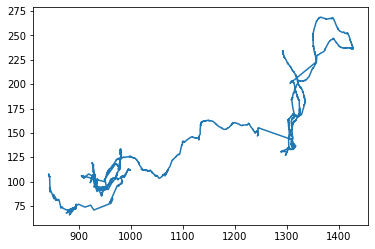

In [26]:
plt.plot(locs[:,0],locs[:,1])

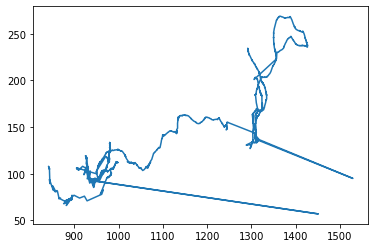

In [18]:
plt.plot(locs[:,0],locs[:,1])

In [316]:
counts = np.zeros((13,13))
for i_ind,i in enumerate(np.arange(-180,180,30)):
    for j_ind,j in enumerate(np.arange(-180,180,30)):
        counts[i_ind,j_ind] = len(traj_df.query('obs_b=='+str(i)+' & obs_h=='+str(j)))

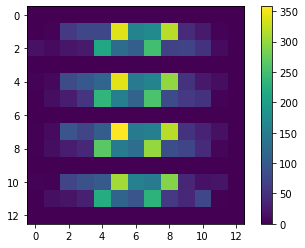

In [317]:
plt.imshow(counts)
plt.colorbar()

In [345]:
def quick_data4plot(df,action,key1):
    tmp = df.loc[df['action']==action][key1]
    keydat = np.zeros(tmp.size)
    for i,rw in enumerate(tmp):
        keydat[i] = rw
        
    tmp = df.loc[df['action']==action]['reward']
    r = np.zeros(tmp.size)
    for i,rw in enumerate(tmp):
        r[i] = rw
    return keydat, r

In [346]:
keydat, r = quick_data4plot(traj_df,0,'obs_b')

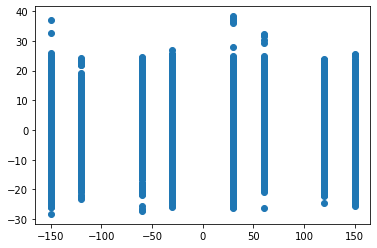

In [350]:
plt.scatter(r,keydat)

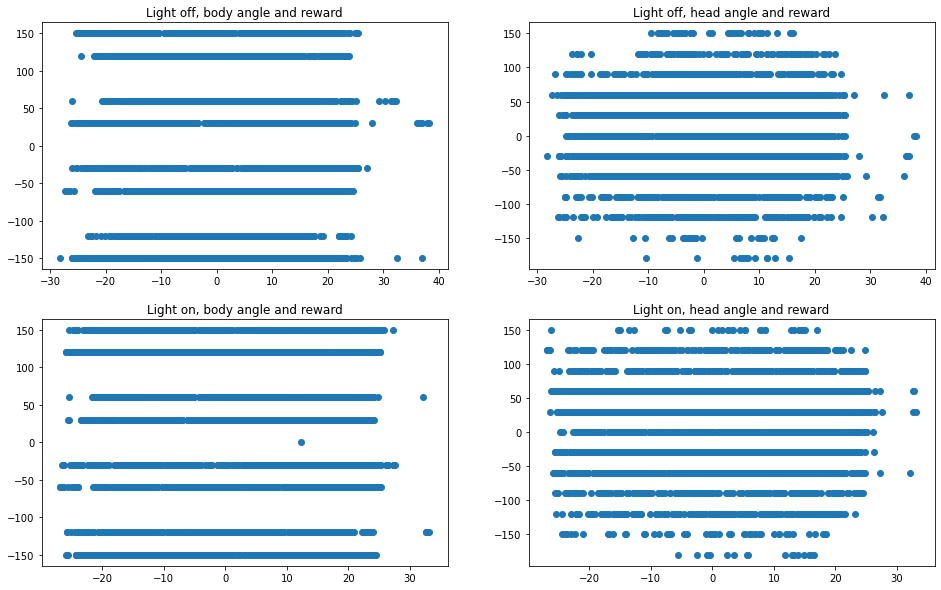

In [352]:
fig,ax = plt.subplots(2,2);
fig.set_size_inches((16,10))
obs = [[],[]]
obs[0], r = quick_data4plot(traj_df,0,'obs_b')
obs[1], r = quick_data4plot(traj_df,0,'obs_h')

ax[0,0].scatter(r,obs[0])
ax[0,0].set_title('Light off, body angle and reward');
ax[0,1].scatter(r,obs[1])
ax[0,1].set_title('Light off, head angle and reward');

obs = [[],[]]
obs[0], r = quick_data4plot(traj_df,1,'obs_b')
obs[1], r = quick_data4plot(traj_df,1,'obs_h')

ax[1,0].scatter(r,obs[0])
ax[1,0].set_title('Light on, body angle and reward');
ax[1,1].scatter(r,obs[1])
ax[1,1].set_title('Light on, head angle and reward');

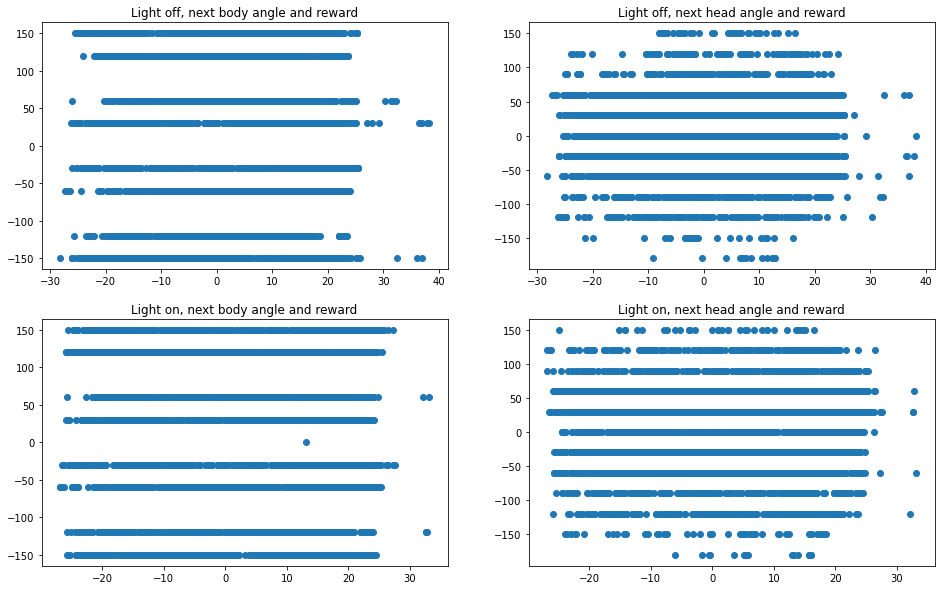

In [353]:
fig,ax = plt.subplots(2,2);
fig.set_size_inches((16,10))
obs = [[],[]]
obs[0], r = quick_data4plot(traj_df,0,'next_obs_b')
obs[1], r = quick_data4plot(traj_df,0,'next_obs_h')
obs = np.array(obs)

ax[0,0].scatter(r,obs[0])
ax[0,0].set_title('Light off, next body angle and reward');
ax[0,1].scatter(r,obs[1])
ax[0,1].set_title('Light off, next head angle and reward');

obs = [[],[]]
obs[0], r = quick_data4plot(traj_df,1,'next_obs_b')
obs[1], r = quick_data4plot(traj_df,1,'next_obs_h')
obs = np.array(obs)

ax[1,0].scatter(r,obs[0])
ax[1,0].set_title('Light on, next body angle and reward');
ax[1,1].scatter(r,obs[1])
ax[1,1].set_title('Light on, next head angle and reward');

In [95]:
def lin_interp_mat(mat, wraparound=False):
    # Fills in NaNs in matrix by linear interpolation. 
    # Only considers nearest neighbors (no diagonals).
    # Fills in NaNs from most neighbors to least neighbors.
    # wraparound extends matrix in all four directions. Haven't really gotten this to work with edge cases yet.
    
    mat = make_wraparound(mat, wraparound=wraparound)

    # Find nans in relevant matrix section
    nan_inds = np.argwhere(np.isnan(mat[1:-1,1:-1])) + 1
        # add 1 because need index for extended matrix
    
    neighbor_lim = 3
    while nan_inds.size>0:
        candidates = 0
        for ind in nan_inds:
            neighbors = get_neighbors(mat,ind)
            if sum(~np.isnan(neighbors)) >= neighbor_lim:
                mat[ind[0],ind[1]] = np.mean(neighbors[~np.isnan(neighbors)])
                candidates+=1
        if candidates==0:
            neighbor_lim-=1
        nan_inds = np.argwhere(np.isnan(mat[1:-1,1:-1])) + 1

    return mat[1:-1,1:-1]

def set_range(mat):
    mat[mat<-180] += 360
    mat[mat>=180] -= 360
    return mat

def get_neighbors(mat,i):
    # Makes array of four neighbors around mat[index]
    # index is a pair
    return np.array([mat[i[0],i[1]-1], mat[i[0],i[1]+1], mat[i[0]-1,i[1]], mat[i[0]+1,i[1]]])

def make_wraparound(mat,wraparound=False):
    # Expands matrix for wraparound interpolation
    
    mat_new = np.zeros((np.array(mat.shape)+2)) + np.nan
    mat_new[1:-1,1:-1] = mat

    if wraparound:
        mat_new[0,1:-1] = mat[-1,:] 
        mat_new[-1,1:-1] = mat[0,:] 
        mat_new[1:-1,0] = mat[:,-1] 
        mat_new[1:-1,-1] = mat[:,0] 
    return mat_new

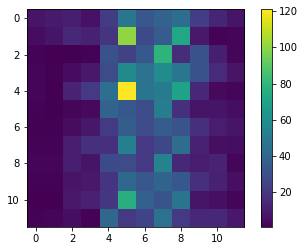

In [78]:
c_int = lin_interp_mat(counts)
plt.imshow(c_int)
plt.colorbar()

In [68]:
def get_stats_angs(df,obs,newkey):
    # gets mean and std for the newkey df values that match obs in oldkey, centered on obs.
    # As in, series will first be translated to [obs-180,obs+180].
    # Keeping the convention of keep the floor, remove the ceiling when rounding.
    
    # Remove points where HT orientation switched
    backwards = obs[0]-180
    if backwards < -180:
        backwards += 360
    
    series = df.query('obs_b=='+str(obs[0])+'& obs_h=='+str(obs[1])+
                      '& next_obs_b!='+str(backwards))[newkey].to_numpy()
    
    if newkey=='next_obs_h':
        series[series<obs[1]-180] += 360
        series[series>=obs[1]+180] -= 360
    elif newkey=='next_obs_b':
        series[series<obs[0]-180] += 360
        series[series>=obs[0]+180] -= 360     
    
    # if there was only one sample, make up a distribution anyway.
    if series.size == 0:
        sermean,stderr = np.nan,np.nan
    else:
        if np.std(series)==0:
            stderr = np.nan # Leaving it up to interpolation
        else:
            stderr = np.std(series) #/np.sqrt(series.size)

        sermean = np.mean(series)
        if sermean<-180:
            sermean += 360
        elif sermean>=180:
            sermean -= 360
            
    return sermean,stderr

def make_interp(mat, wraparound=False, plotit=True):
    # Returns a matrix that's been through the linear interpolation function.
    # [12,12,2] with dimensions [body,head,mu/sig] 
    
    sh = mat.shape
    if plotit:
        fig,ax = plt.subplots(1,sh[2])
        fig.set_size_inches((8,5))
    if len(sh) < 3:
        mat = np.expand_dims(mat,axis=2)
    m_ints = np.zeros((sh[0],sh[1],2))
    
    for i in range(2):
        m_ints[:,:,i] = lin_interp_mat(mat[:,:,i],wraparound=wraparound)
        if plotit:
            im = ax[i].imshow(m_ints[:,:,i])
            fig.colorbar(im,ax=ax[i])
    return np.squeeze(m_ints)

In [96]:
r_mat = np.zeros((12,12,2))+np.nan
b_mat = np.zeros((12,12,2))+np.nan
h_mat = np.zeros((12,12,2))+np.nan
for i,theta_b in enumerate(np.arange(-180,180,30)):
    for j,theta_h in enumerate(np.arange(-180,180,30)):
        r_mat[i,j,:] = get_stats_angs(traj_df,[theta_b,theta_h],'reward');
        b_mat[i,j,:] = get_stats_angs(traj_df,[theta_b,theta_h],'next_obs_b');
        h_mat[i,j,:] = get_stats_angs(traj_df,[theta_b,theta_h],'next_obs_h');

# 30 timestep lookahead

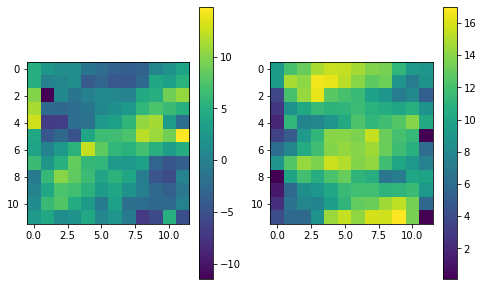

In [70]:
# Reward mean and stderr
r_int = make_interp(r_mat)

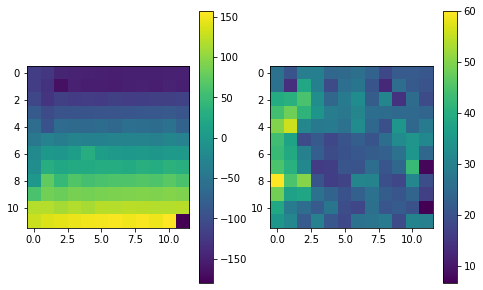

In [72]:
# Body angle mean and stderr
b_int = make_interp(b_mat,wraparound=False)

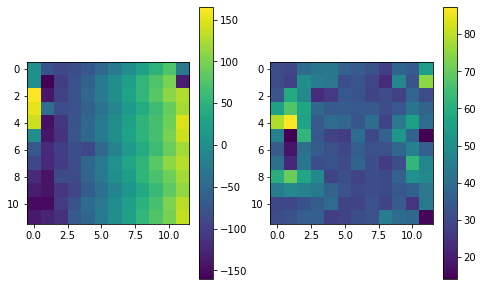

In [73]:
# Head angle mean and stderr
h_int = make_interp(h_mat)

# 50 timestep lookahead

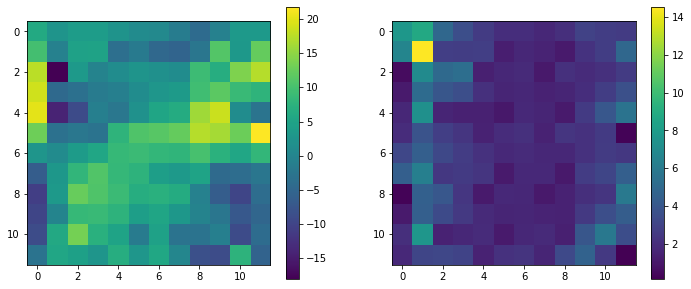

In [380]:
# Reward mean and stderr
r_int = make_interp(r_mat)

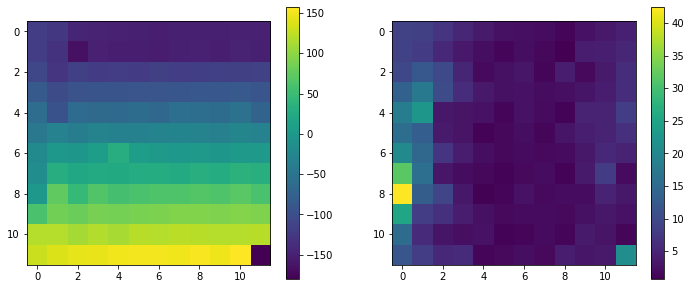

In [381]:
# Body angle mean and stderr
b_int = make_interp(b_mat,wraparound=False)

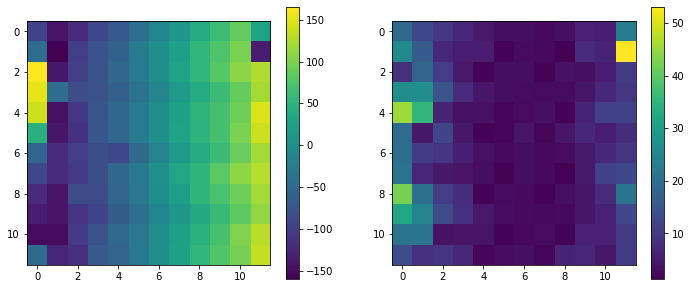

In [382]:
# Head angle mean and stderr
h_int = make_interp(h_mat)

# Using the above matrices to make an env

In [74]:
r_on_mat = np.zeros((12,12,2))+np.nan
b_on_mat = np.zeros((12,12,2))+np.nan
h_on_mat = np.zeros((12,12,2))+np.nan

r_off_mat = np.zeros((12,12,2))+np.nan
b_off_mat = np.zeros((12,12,2))+np.nan
h_off_mat = np.zeros((12,12,2))+np.nan

traj_on = traj_df.query('action==1')
traj_off = traj_df.query('action==0')

for i,theta_b in enumerate(np.arange(-180,180,30)):
    for j,theta_h in enumerate(np.arange(-180,180,30)):
        r_on_mat[i,j,:] = get_stats_angs(traj_on,[theta_b,theta_h],'reward');
        b_on_mat[i,j,:] = get_stats_angs(traj_on,[theta_b,theta_h],'next_obs_b');
        h_on_mat[i,j,:] = get_stats_angs(traj_on,[theta_b,theta_h],'next_obs_h');
        
        r_off_mat[i,j,:] = get_stats_angs(traj_off,[theta_b,theta_h],'reward');
        b_off_mat[i,j,:] = get_stats_angs(traj_off,[theta_b,theta_h],'next_obs_b');
        h_off_mat[i,j,:] = get_stats_angs(traj_off,[theta_b,theta_h],'next_obs_h');

In [75]:
dist_dict = {
    'body_on': make_interp(b_on_mat,plotit=False),
    'body_off': make_interp(b_off_mat,plotit=False),
    'head_on': make_interp(h_on_mat,plotit=False),
    'head_off': make_interp(h_off_mat,plotit=False),
    'reward_on': make_interp(r_on_mat,plotit=False),
    'reward_off': make_interp(r_off_mat,plotit=False),
}

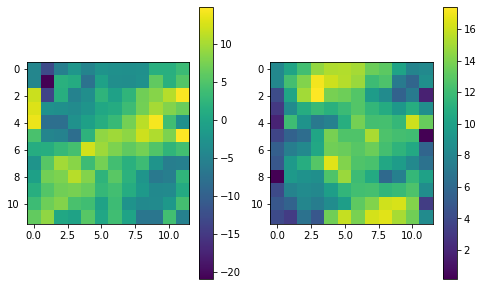

In [76]:
# Reward mean and stderr
r_on_int = make_interp(r_on_mat)

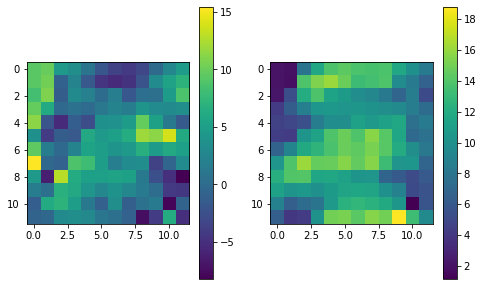

In [77]:
# Reward mean and stderr
r_off_int = make_interp(r_off_mat)

In [58]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt

class FakeWorm(gym.Env):
    """Custom Environment that follows gym interface"""
    metadata = {'render.modes': ['human']}

    def __init__(self, distribution_dict, start=None, ep_len=1e6):
        '''
        distribution_dict must have the following:
        body_on: [12,12,2] with dimensions [body angle, head angle, mu/sig]. 
        body_off: ''
        head_on: ''
        head_off: ''
        reward_on: ''
        reward_off: ''
        '''
        super(FakeWorm, self).__init__()
        # Setting environment parameters
        self.grid_width = 12        
        self.action_space = spaces.Discrete(2) # Light off or on.
        self.observation_space = spaces.Discrete(self.grid_width**2) 
        
        # Setting initial conditions
        if start is None:
            self._state = np.random.choice(self.grid_width**2)
        else:
            self._state = self.grid2obs(start)
        self.state = self.obs2grid(self._state)
            
        # Setting self parameters
        self.dist_dict = distribution_dict
        self.ep_len = ep_len
        self.steps = 0
        self.finished = False
        
    ''' Conversion functions '''
    # obs is from 0 to 143.
    # grid is [-180 to 150, -180 to 150]
    # coords is [0 to 11, 0 to 11]
    def obs2grid(self,obs):
        gridcoords = np.array([obs//self.grid_width, obs%self.grid_width])
        return (gridcoords*30)-180
    def grid2obs(self,gridcoords):
        gridcoords = ((np.array(gridcoords)+180)/30).astype(int)
        return self.grid_width*gridcoords[0] + gridcoords[1]
    def grid2coords(self,gridcoords):
        return (np.array(gridcoords)+180)//30
    def coords2grid(self,coords):
        return (np.array(coords)*30)-180
    ''' End of conversion functions '''
    
        
    def step(self, action):
        """Chooses action and returns a (step_type, reward, discount, observation)"""
        self.steps += 1
        # If step count reaches episode length
        if self.steps >= self.ep_len:
            self.finished = True
            
        # Draws new reward and state from previous state 
        olds = self.grid2coords(self.state)
        if action==0:
            self.state[0] = self.get_sample('body_off', olds)
            self.state[1] = self.get_sample('head_off', olds)
            reward = self.get_sample('reward', olds)
        elif action==1:
            self.state[0] = self.get_sample('body_on', olds)
            self.state[1] = self.get_sample('body_off', olds)
            reward = self.get_sample('reward', olds)
        else:
            raise ValueError('Invalid action')
                       
        # Return obs, reward, done (boolean), info (dict)
        self.state = self.obs2grid(self._state)
        return self._state, reward, self.finished, {}

        
    def reset(self,start=None,target=None):
        """Returns the first `TimeStep` of a new episode."""
        self.finished = False
        self.steps = 0
        # Setting initial conditions
        if start is None:
            self._state = np.random.choice(self.grid_width**2)
        else:
            self._state = self.grid2obs(start)
        self.state = self.obs2grid(self._state)
        
        # Takes one step and returns the observation
        return self._state
    
    def render(self, mode='human', close=False):
        print('At',self.state)

    ''' Utility '''
    def get_sample(self,dkey,olds):
        # Returns a single sample from normal distribution given by statistics in dictionary[dkey], 
        # at location given by olds (index into matrix in dkey)
        mu,sig = self.dist_dict[dkey][olds[0],olds[1]]
        if dkey=='reward':
            return np.random.normal(mu,sig)
        else:
            return self.myround(np.random.normal(mu,sig))
                       
    def myround(self, x, base=30):
        return base * round(x/base)

In [59]:
def get_sample(dkey,olds):
    # Returns a single sample from normal distribution given by statistics in dictionary[dkey], 
    # at location given by olds (index into matrix in dkey)
    mu,sig = dist_dict[dkey][olds[0],olds[1]]
    print(mu,sig)
    if 'reward' in dkey:
        return np.random.normal(mu,sig)
    else:
        return myround(np.random.normal(mu,sig))

def myround(x, base=30):
    return base * round(x/base)
def grid2coords(gridcoords):
    return (np.array(gridcoords)+180)//30

In [85]:
oldstate = [-180,-30]
olds = grid2coords(oldstate)
get_sample('body_off',olds)

-151.72813588850175 24.589663040383474


-120

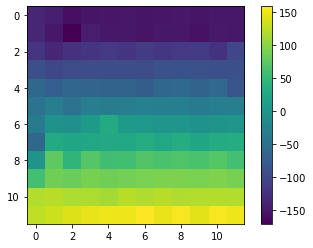

In [55]:
plt.imshow(dist_dict['body_on'][:,:,0])
plt.colorbar()

In [52]:
dist_dict['body_on'][0,5,0]

0.08015551641408554

# Testing

In [1]:
import utils
import model_env as me

In [2]:
fnames=[
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl',
    'Data/traj12-11-2020_20-15-17.pkl',
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430
]

xlims = [1e6,1e6,1e6,1430]

traj_df = utils.make_df(fnames,xlimit=xlims,time_steps=10)

In [14]:
traj_df

,obs_b,obs_h,action,next_obs_b,next_obs_h,reward,loc,t
0,120,30,0,120,30,0.985065,"[1076.5333333333333, 863.05]",0.375
1,120,30,0,120,60,0.256223,"[1076.983606557377, 862.7377049180328]",0.562
2,120,60,0,120,60,-0.721617,"[1076.9516129032259, 862.6290322580645]",0.750
3,120,60,0,150,0,-1.037500,"[1077.140625, 862.4375]",0.937
4,150,0,0,120,30,-2.452708,"[1077.768115942029, 861.9420289855072]",1.125
...,...,...,...,...,...,...,...,...
9332,-150,-30,1,-150,-30,-13.600000,"[843.5, 106.0]",83.515
9333,-150,-30,1,-150,-30,-13.800000,"[843.25, 106.0]",83.703
9334,-150,-30,1,150,60,-14.018182,"[843.6, 105.80000000000001]",83.890
9335,150,60,1,150,60,-13.333333,"[842.0, 108.0]",84.078


In [3]:
dist_dict = utils.make_dist_dict(traj_df)

In [4]:
toy_worm = me.FakeWorm(dist_dict)

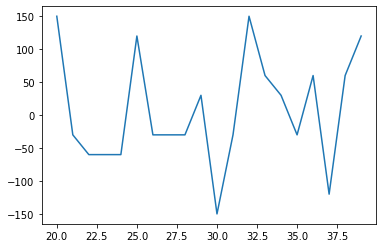

In [12]:
plt.plot(traj_df['obs_b'][20:40])

In [8]:
steps = 200
obs = np.zeros((steps,2))
rew = np.zeros(steps)
for i in range(steps):
    action = np.random.choice(2)
    obs[i,:],rew[i],done,info = toy_worm.step(action)

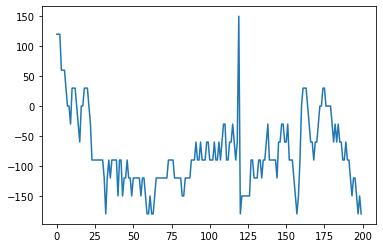

In [9]:
plt.plot(obs[:,0])

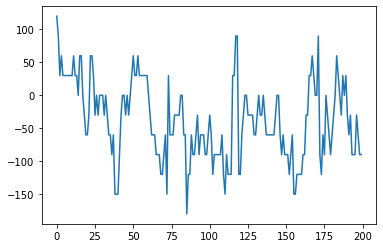

In [10]:
plt.plot(obs[:,1])

In [55]:
toy_worm = me.FakeWorm(dist_dict)
steps = 1000000 # 1 mil steps

obs = np.zeros((steps,2))
rew = np.zeros(steps)
action = 0
for i in range(steps):
    obs[i,:],rew[i],done,info = toy_worm.step(action)
    prod = np.sign(obs[i,0]*obs[i,1])
    if prod<0:
        action = 0
    else:
        action = 1

In [50]:
# Always off
2271844.452421833/1e6

2.2718444524218326

In [51]:
# Always on
926747.9848525118/1e6

0.9267479848525118

In [57]:
# Opposite policy
-453352.8468463348/1e6

-0.4533528468463348

In [54]:
# Correct policy
3897350.249438305/1e6

3.897350249438305